In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression
import plotly.express as px
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
df= pd.read_csv("customer_data.csv")
df.head()

name  age  gender    education  income   country  \
0  Teresa Williams MD   42  Female  High School   53936  Slovenia   
1     Christine Myers   49  Female       Master   82468     Aruba   
2       Dwayne Moreno   55    Male     Bachelor   56941    Cyprus   
3          Amy Norton   24  Female     Bachelor   60651     Palau   
4         Tonya Adams   64    Male       Master   81884    Zambia   

   purchase_frequency   spending  
0                 0.9  13227.120  
1                 0.6  12674.040  
2                 0.3   5354.115  
3                 0.2   2606.510  
4                 0.9  18984.780

DATA UNDERSTANDING

In [ ]:
df.shape

(1000, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                1000 non-null   object 
 1   age                 1000 non-null   int64  
 2   gender              1000 non-null   object 
 3   education           1000 non-null   object 
 4   income              1000 non-null   int64  
 5   country             1000 non-null   object 
 6   purchase_frequency  1000 non-null   float64
 7   spending            1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [ ]:
df.describe()

age        income  purchase_frequency      spending
count  1000.000000   1000.000000         1000.000000   1000.000000
mean     41.754000  59277.852000            0.554600   9613.296835
std      13.778582  23258.377128            0.284675   5484.707210
min      18.000000  20031.000000            0.100000    611.985000
25%      30.000000  38825.500000            0.300000   5020.425000
50%      42.000000  58972.000000            0.600000   9430.395000
75%      54.000000  79114.000000            0.800000  13645.507500
max      65.000000  99780.000000            1.000000  25546.500000

In [ ]:
df.dtypes

name                   object
age                     int64
gender                 object
education              object
income                  int64
country                object
purchase_frequency    float64
spending              float64
dtype: object

In [ ]:
df.isnull().sum()

name                  0
age                   0
gender                0
education             0
income                0
country               0
purchase_frequency    0
spending              0
dtype: int64

DATA VISUALIZATION

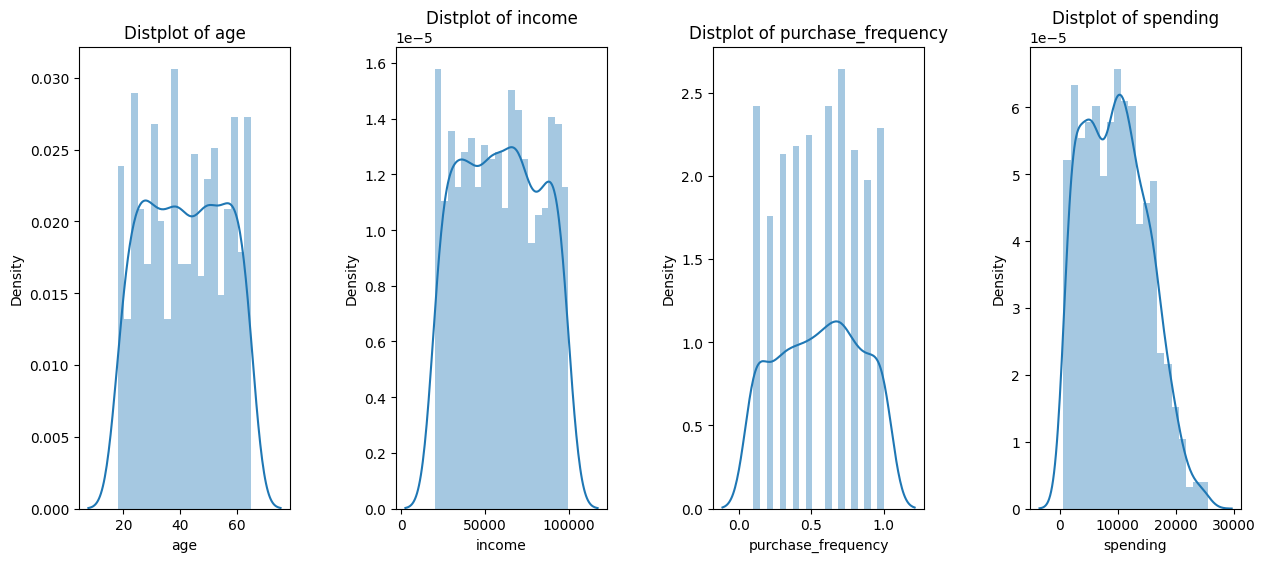

In [ ]:
# Distplot: Analyzing Univariate Distributions

plt.figure(1 , figsize = (15 , 6))
n=0

for x in ['age', 'income', 'purchase_frequency', 'spending']:
  n+=1
  plt.subplot(1,4,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.distplot(df[x], bins=20)
  plt.title('Distplot of {}' .format(x))
plt.show()

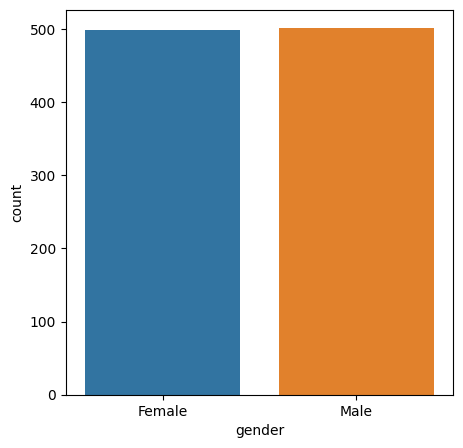

In [ ]:
#Countplot for Categorical Features

plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='gender', hue="gender")
plt.show()

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250'),
  Text(0, 300.0, '300')])

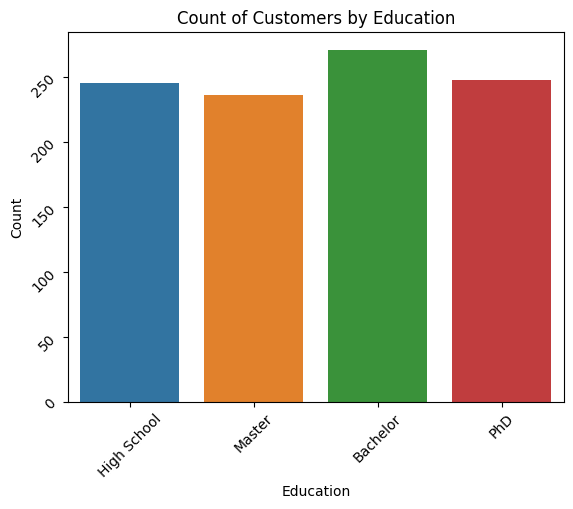

In [ ]:
sns.countplot(x= 'education', data= df, hue='education')
plt.title('Count of Customers by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation =45)
plt.yticks(rotation =45)

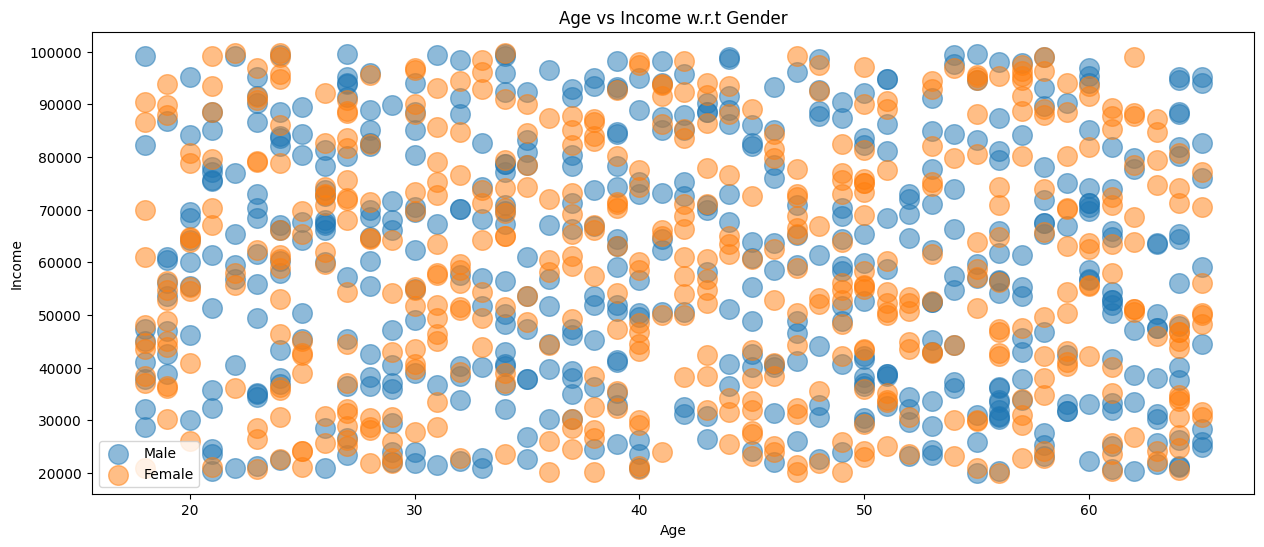

In [ ]:
#Scatter Plot: Visualizing Relationships between Variables

plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'age' , y = 'income' , data = df[df['gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Income')
plt.title('Age vs Income w.r.t Gender')
plt.legend()
plt.show()

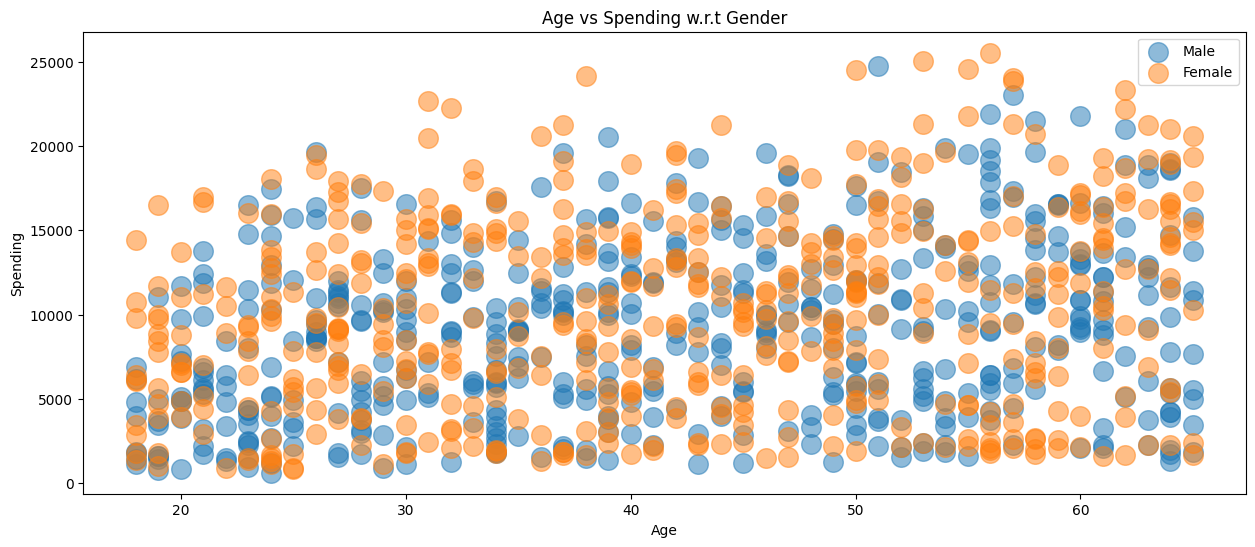

In [ ]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'age' , y = 'spending' , data = df[df['gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Spending')
plt.title('Age vs Spending w.r.t Gender')
plt.legend()
plt.show()

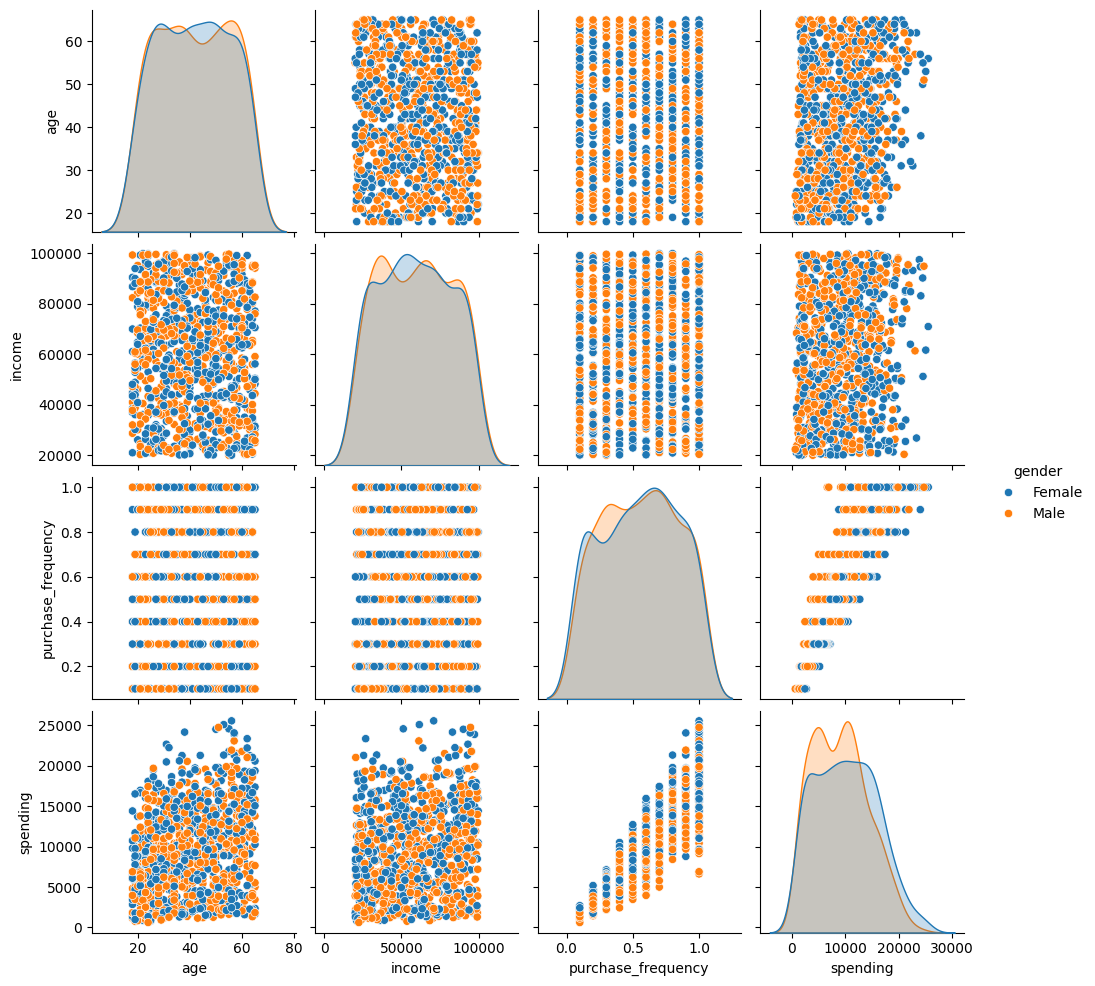

In [ ]:
#Multi-variant Relationship
sns.pairplot(df, hue= 'gender')

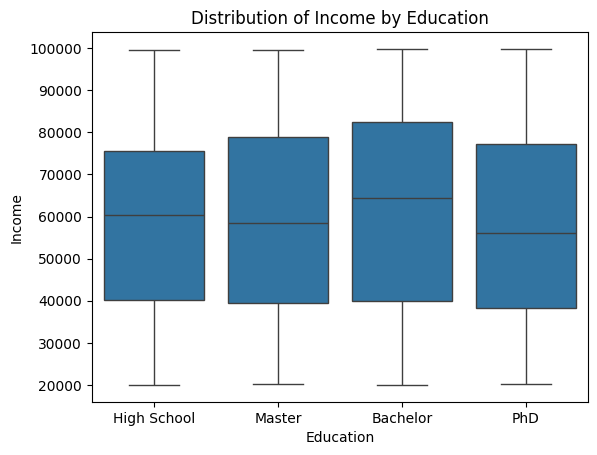

In [ ]:
sns.boxplot(x= 'education', y= 'income', data= df)
plt.title('Distribution of Income by Education')
plt.xlabel('Education')
plt.ylabel('Income')
plt.show()

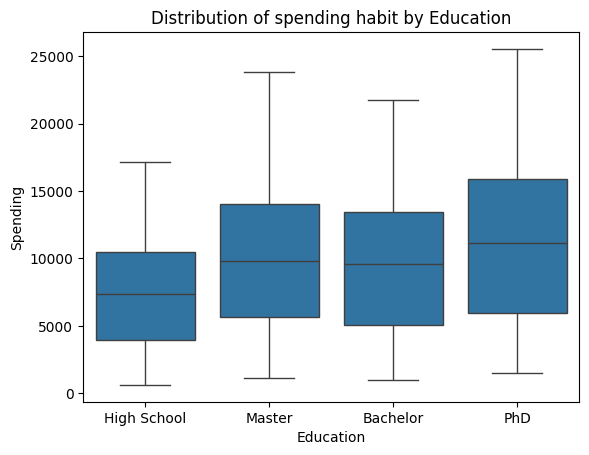

In [ ]:
sns.boxplot(x= 'education', y= 'spending', data= df)
plt.title('Distribution of spending habit by Education')
plt.xlabel('Education')
plt.ylabel('Spending')
plt.show()

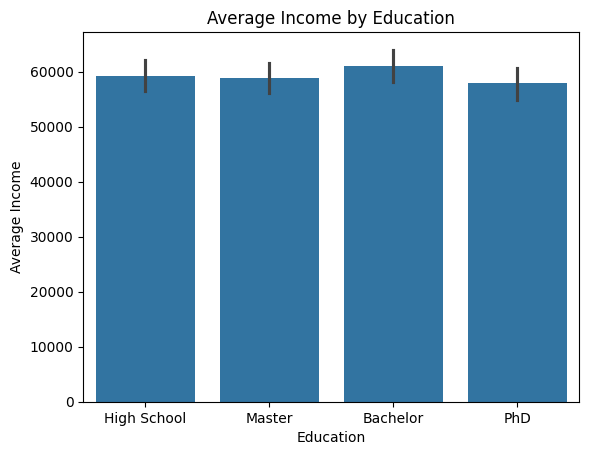

In [ ]:
#plt.figure(figsize=(10,5))
sns.barplot(x='education', y='income', data=df)
plt.title('Average Income by Education')
plt.xlabel('Education')
plt.ylabel('Average Income')
plt.show()

**Importing Models**

The accuracy is  0.0


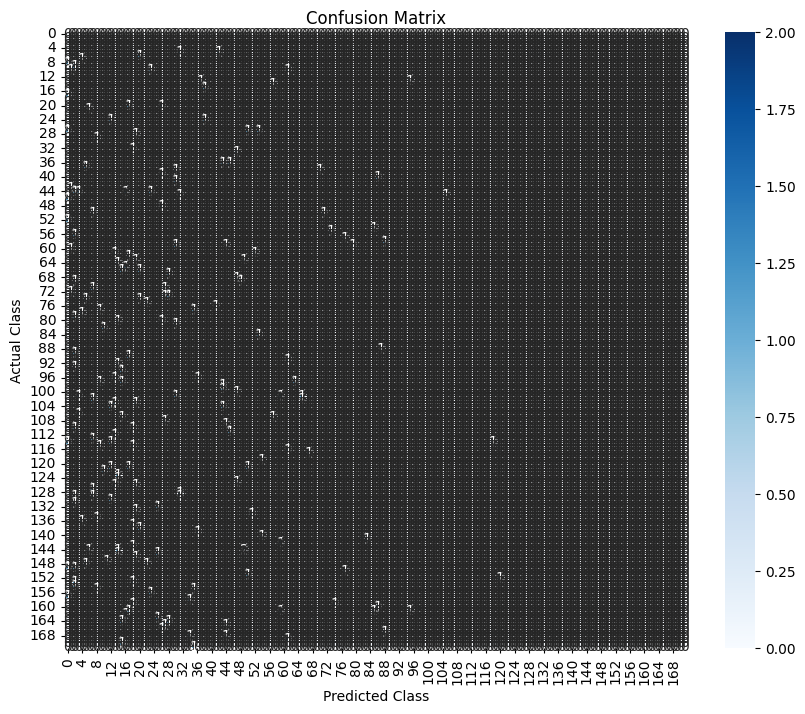

In [ ]:
#KNN

x= df[['age','income','purchase_frequency','spending']]
y= df['country']

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size= 0.2, random_state= 42)

knn= KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)
y_pred= knn.predict(x_test)

acc= accuracy_score(y_test,y_pred)
print('The accuracy is ', acc)

cm= confusion_matrix(y_test, y_pred)
plt.figure(figsize= (10,8) )
sns.heatmap(cm, annot=True, fmt= 'd', cmap= 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

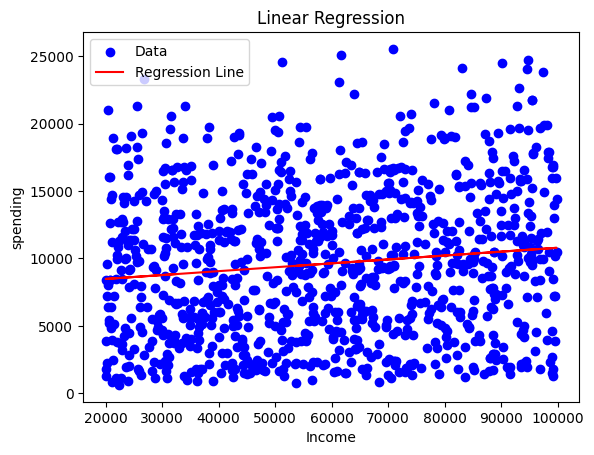

In [ ]:
#Linear Regression
x=df['income'].values.reshape(-1,1)
y=df['spending'].values.reshape(-1,1)

model= LinearRegression()
model.fit(x,y)
y_pred= model.predict(x)
coeff= model.coef_[0]
intercept= model.intercept_

plt.scatter(x,y,color='blue',label='Data')
plt.plot(x,y_pred,color='red',label='Regression Line')
plt.xlabel('Income')
plt.ylabel('spending')
plt.title('Linear Regression')
plt.legend()

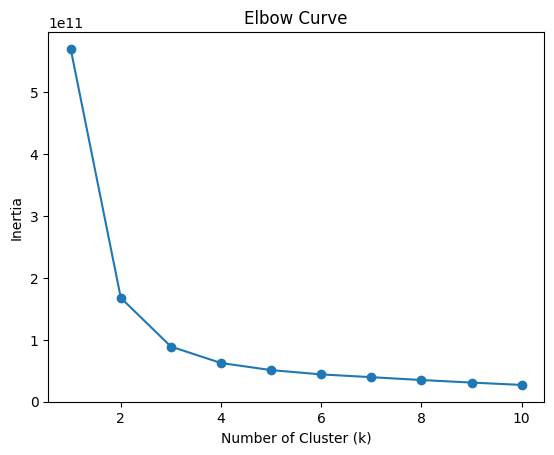

In [ ]:
#K-Means Clustering

X = df[['age', 'income', 'spending']].values

k_values= list(range(1,11))
intertia_values= []

for k in k_values:
  kmeans= KMeans(n_clusters= k, random_state= 42)
  kmeans.fit(X)
  intertia_values.append(kmeans.inertia_)

plt.plot(k_values, intertia_values, marker= 'o')
plt.xlabel('Number of Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

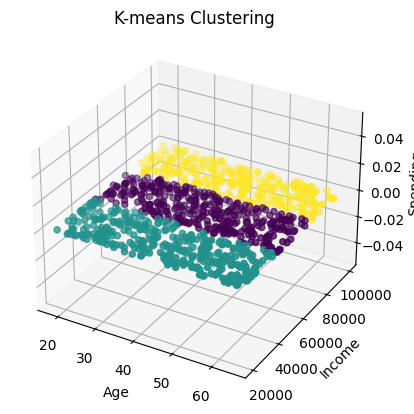

In [ ]:
best_k= 3
kmeans= KMeans(n_clusters= best_k, random_state= 42)
kmeans.fit(X)
labels= kmeans.labels_
df['Cluster']= labels

fig= plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Spending')
ax.set_title('K-means Clustering')

plt.show()

In [ ]:
fig = px.scatter_3d(df, x='age', y='income', z='spending', color='Cluster')

fig.update_layout(title='K-means Clustering',scene=dict(
    xaxis_title='Age',
    yaxis_title='Income',
    zaxis_title='Spending',
))
fig.show(renderer='notebook')

fig.show()